# Montgomery County Traffic Violations - Python EDA 🚗
Dataset: https://catalog.data.gov/dataset/traffic-violations


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "Traffic_Violations.csv"
file_path = os.path.join(os.getcwd(), file_name)
df = pd.read_csv(file_path, low_memory = False)
pd.options.display.max_columns = None # Allows for all columns to be displayed
pd.options.display.float_format = "{:.2f}".format # Stops numbers from being displayed in scientific notation
sns.set_style("whitegrid")

df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.00,0.00,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.00,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.05,-77.05,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.00,TOYOTA,COROLLA,RED,Citation,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.05,-77.05,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.00,TOYOTA,COROLLA,RED,Citation,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.06,-77.05,No,No,No,Yes,No,No,No,No,No,No,Yes,Property Only,Arrest,Incident to Arrest,20-103(b),Both,Stop,MD,02 - Automobile,2004.00,TOYOTA,HB,SILVER,Citation,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,11/25/2023,05:45:00,MCP,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.00,0.00,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2022.00,MITSUBISHI,ECLIPSE CROSS,BLACK,Citation,21-901.1(a),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [2]:
print(df.shape)

(1966792, 43)


## Clean and Format Data

<br>

#### 1) Duplicated columns

<br>

In [3]:
print("There are ", df.duplicated().sum(), " duplicated columns")
df1 = df[df.duplicated()]
df1.head()


There are  2307  duplicated columns


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
87,05e89179-bc32-4fad-aa34-719b8717b63c,11/25/2023,00:43:00,MCP,Headquarters and Special Operations,DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,RIDGE ROAD @ FREDERICK ROAD,39.20,-77.26,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-204(b),NaN,NaN,VA,28 - Other,2012.00,FORD,ECONOLINE,SILVER,Warning,21-204(b),Transportation Article,False,WHITE,M,MCLEAN,VA,VA,B - Unmarked Patrol,"(39.2011833333333, -77.25582)"
89,e4057fa7-5f65-4a22-852e-2963336a4822,11/25/2023,01:09:00,MCP,Headquarters and Special Operations,DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,RIDGE ROAD @ FREDERICK ROAD,39.20,-77.26,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-204(b),NaN,NaN,MD,02 - Automobile,2022.00,HOND,SD,WHITE,Warning,21-204(b),Transportation Article,False,WHITE,M,HOLLYWOOD,FL,FL,B - Unmarked Patrol,"(39.1989683333333, -77.26141)"
92,e1a6b373-da9d-4926-944d-eed6cbaf5737,11/25/2023,02:17:00,MCP,Headquarters and Special Operations,DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,RIDGE ROAD @ FREDERICK ROAD,39.20,-77.26,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-204(b),NaN,NaN,VA,02 - Automobile,2018.00,TOYOTA,RAV4,WHITE,Warning,21-204(b),Transportation Article,False,HISPANIC,F,ALEXANDRIA,VA,VA,B - Unmarked Patrol,"(39.20057, -77.2578033333333)"
4889,56652363-2488-4509-b4b5-1275b1d9a1b6,07/26/2024,00:21:00,MCP,Headquarters and Special Operations,STOPPING VEH. ON CROSSWALK,FIRSTFIELD RD @QUINCE ORCHARD RD,39.15,-77.22,No,No,No,No,No,No,No,No,No,No,Yes,Contraband Only,Arrest,Incident to Arrest,21-1003(e),Both,Stop,MD,02 - Automobile,2010.00,HONDA,CIVIC,WHITE,Citation,21-1003(e),Transportation Article,False,BLACK,M,ROCKVILLE,MD,MD,B - Unmarked Patrol,"(39.146935, -77.2192466666667)"
5476,fb25ae50-c734-4627-bf51-7377a23fba10,05/11/2023,08:20:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,HILLCREST ST/ROSEMARY CIR,38.98,-77.08,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,21-201(a1),NaN,NaN,DC,02 - Automobile,2018.00,BUICK,SUV,GRAY,Warning,21-201(a1),Transportation Article,False,WHITE,F,WASHINGTON,DC,DC,A - Marked Patrol,"(38.9773753333333, -77.0805438333333)"


In [4]:
notImportant = ["Latitude", "Longitude", "Driver State", "DL State", "Geolocation", "Location", "SubAgency"]
df.drop(columns = notImportant, inplace = True)

df.drop_duplicates(inplace = True)
print("There are", df.duplicated().sum(), "duplicated columns")


There are 0 duplicated columns


<br>

#### 2) Empty columns

<br>

In [5]:
missingdf = pd.DataFrame(columns = ["Amount Missing", "% Missing"])
missingdf["Amount Missing"] = df.isna().sum()[df.isna().sum() > 0]

# Missing % = # / total rows
missingdf["% Missing"] = missingdf["Amount Missing"] * 100 / len(df.index) 
display(missingdf.T)


,Description,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,Year,Make,Model,Color,Article,Driver City
Amount Missing,10.00,746665.00,1877756.00,765915.00,1877756.00,746950.00,1877763.00,1904853.00,59.00,10480.00,72.00,221.00,21912.00,88779.00,496.00
% Missing,0.00,38.01,95.59,38.99,95.59,38.02,95.59,96.97,0.00,0.53,0.00,0.01,1.12,4.52,0.03


In [6]:
canDrop = ["Description", "Year", "Make", "Model", "Color", "Article", "State", "Driver City", "State"]
df = df.dropna(subset = canDrop)


display(df.isna().sum()[df.isna().sum() > 0])

Search Conducted           711805
Search Disposition        1768672
Search Outcome             730539
Search Reason             1768672
Search Reason For Stop     712082
Search Type               1768679
Search Arrest Reason      1794921
dtype: int64

Remaining columns with NaN make up more than 5% of the total rows . The columns are all categorical and about search data so they cant be filled and can be left alone

#### 3) Invalid Data
##### There are some visable data anomolies in the car year column 
<br>


In [7]:
df["Year"] = df["Year"].astype("int")
print((df["Year"].unique()))

[2007 2013 2004 2022 2010 2021 2020 2008 2023 2006 2019 2012 2018 2002
 2016 2003 2014 2015 2009 2011 2005 2017 2000 1996 2001 2024 1998 1997
 5657 1999 1900 1993 1992 1994 1995 1990 1016 2025    0 1987 1991 3013
 8092 2155 1981 1979 1989 1027 2048 1985 2902 2209 5136 2901 1983 1988
 1984 1986 2071 2026 1965 4787 1932 2917 1977 2103 2929 1012 1966 1004
 1011 7089 1655 1026 3840 2101 3812 1195 1980 2201 2091 1280 1909 1971
 5887 2206 1973 8888 1015 2914 2204 2112 8739 2919 1017 1982 2171 4046
 9999 1976 2202 1975 2077 1978 2910 1970 4200 2996 1088 1972 3003  211
 1969 1968 1776 1146 2208 1111 5015 2107 1197 2992    4 8438 1010 1007
 1958 1897 5450 2031 5968 2452 5338 2500 5300 2911    6 1194 5237 3007
 1967 2055 2502 1196 6338 1013 2915 2258 8074 1005 2998 1974 5005 4248
 2096 3940 2104 2105 1001 2102 2941 2109 2207 2205 5257 2995 2814 5795
 3697 4112 1299 1199 2088 2044 2773 1076 2106 1014 6580 3574 9035 5246
 3837  277 1957 4452  205   12 1953 2991 3886 2916   95 1338 2200 1729
 1936 

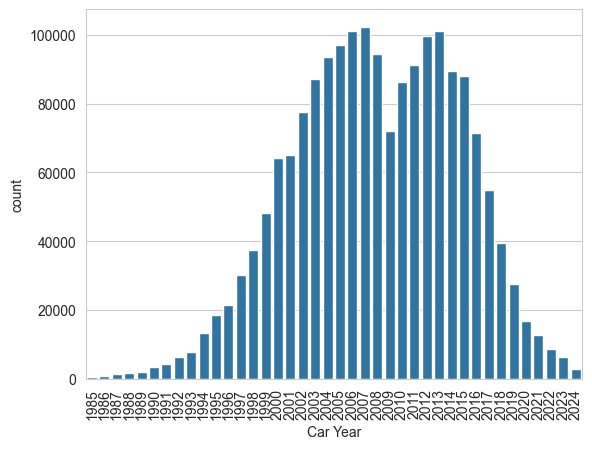

In [8]:
# Car Year column has so many random values (mistyped?)
# Rows with mistyped years can be removed 

df = df[(df["Year"] >= 1985) & (df["Year"] <= 2024)]
sns.countplot(data = df, x = "Year")
plt.xlabel("Car Year")
plt.xticks(rotation = 90)
plt.show()



### Data Analysis 

<br>


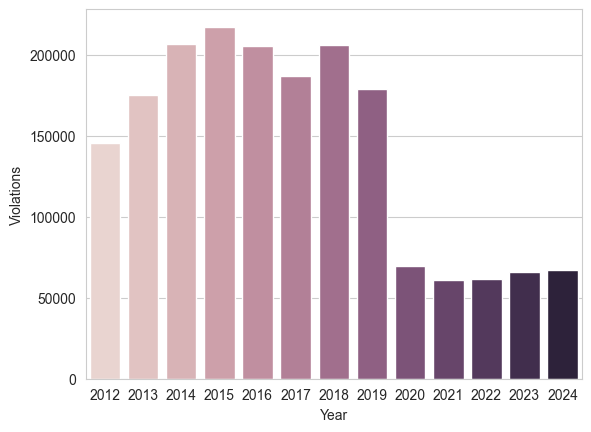

In [9]:
df = df.rename(columns = {"Date Of Stop" : "Date"})
df["Date"] = pd.to_datetime(df["Date"])

sns.countplot(data = df, x = df["Date"].dt.year, hue = df["Date"].dt.year, legend = False)
plt.xlabel("Year"), plt.ylabel("Violations")
plt.show()


There is a sharp decline in violation in 2019-2020 which can be attributed to the COVID lockdown. However, theres minimal change in concurrent years.    According to the SF Standard, police departments after COVID had staffing issues and changed priorites to other types of crime which could explain the trend.

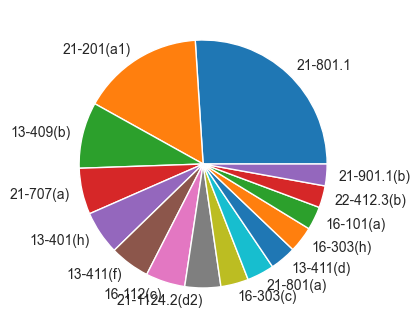

In [10]:
chargeCount = df["Charge"].value_counts().head(15)
plt.figure(figsize = (4,5))
plt.pie(chargeCount, labels = chargeCount.index)
plt.show()


In [11]:
print(df["Charge"].value_counts().head(3).to_string())

Charge
21-801.1      264024
21-201(a1)    161438
13-409(b)      87604


There are 3 traffic violation charges that account for about half of all driving charges in the Montgomery county:
- 21-801.1 - Speeding by exceeding maximum speed limit
- 21-201(a1) - Driver Failure to obey properly placed traffic control devices
- 13-409(b) - Failure to display registration card upon demand by police officer

In [12]:
dfEnc = pd.DataFrame()
dfEnc[["AccidentEnc", "BeltsEnc", "PersonalInjuryEnc", "PropertyDamageEnc", "FatalEnc", "CommercialVehicleEnc", 
    "AlcoholEnc", "WorkZoneEnc", "MakeEnc", "ModelEnc", "ColorEnc", "ViolationEnc", "ChargeEnc", "RaceEnc", "GenderEnc"]] = df[["Accident", "Belts", 
          "Personal Injury", "Property Damage", "Fatal", "Commercial Vehicle", "Alcohol", 
          "Work Zone", "Make", "Model", "Color", "Violation Type", "Charge", "Race", "Gender"]].apply(lambda x: pd.factorize(x)[0])
# Factorize function encodes the selected columns to integers since this dataset has no quantitative data

display(dfEnc.head())

,AccidentEnc,BeltsEnc,PersonalInjuryEnc,PropertyDamageEnc,FatalEnc,CommercialVehicleEnc,AlcoholEnc,WorkZoneEnc,MakeEnc,ModelEnc,ColorEnc,ViolationEnc,ChargeEnc,RaceEnc,GenderEnc
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0
2,0,0,0,0,0,0,0,0,1,1,1,0,2,1,0
3,0,0,0,1,0,0,0,0,1,2,2,0,3,1,0
4,0,0,0,0,0,0,0,0,2,3,0,0,4,0,0


In [13]:
#Most Frequent crime
#Most crime ny hour


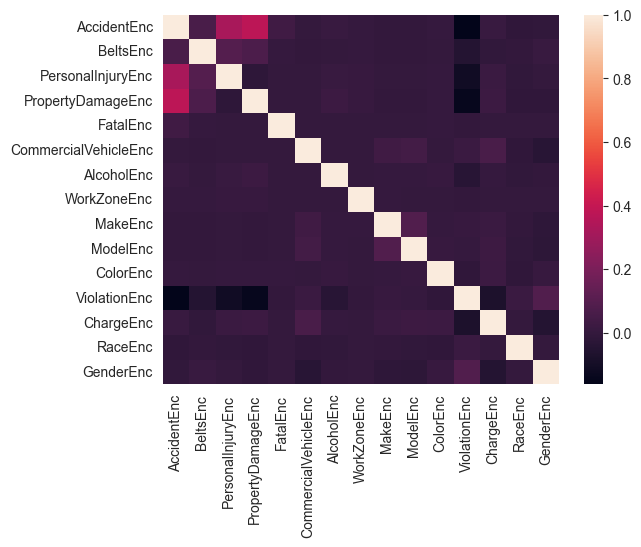

In [14]:
sns.heatmap(dfEnc.corr())
plt.show()

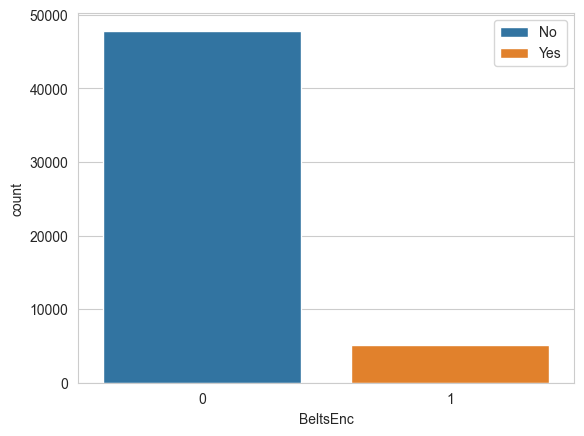

In [15]:
# According to the data set, belts column is relevant only if accident column = Yes
sns.countplot(data = dfEnc[dfEnc["AccidentEnc"] == 1], x = "BeltsEnc", hue = "BeltsEnc")
plt.legend(labels = ["No", "Yes"])
plt.show()

In [16]:
df["Gender"].unique()

array(['M', 'F', 'U'], dtype=object)

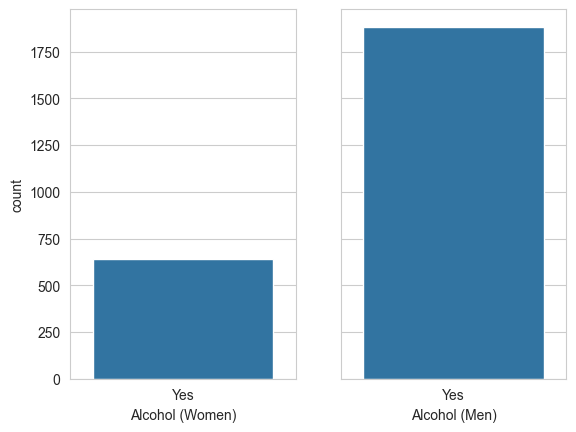

In [17]:
fig, ax = plt.subplots(1,2, sharey = True)
sns.countplot(data = df[(df["Gender"] == "F") & (df["Alcohol"] == "Yes")], x = "Alcohol", ax = ax[0])
ax[0].set_xlabel("Alcohol (Women)")
ax[1].set_xlabel("Alcohol (Men)")
sns.countplot(data = df[(df["Gender"] == "M") & (df["Alcohol"] == "Yes")], x = "Alcohol", ax = ax[1])
plt.show()

The dataset has an unequal amount of each gender which can be compensated by dividing with the total of each group to find the proportion.

In [18]:
alcoholCounts = df[df["Alcohol"] == "Yes"].groupby("Gender").size()
print(alcoholCounts)
totalCount = df["Gender"].value_counts()
print(totalCount)

Gender
F     640
M    1883
dtype: int64
Gender
M    1243436
F     602800
U       2737
Name: count, dtype: int64


In [19]:
print(f"For every 10000 men, there will be about {round(alcoholCounts["M"] / totalCount["M"] * 10000, 2)} men who get into alcohol incidents")
print(f"For every 10000 women, there will be about {round(alcoholCounts["F"] / totalCount["F"] * 10000, 2)} women who get into alcohol incidents")


For every 10000 men, there will be about 15.14 men who get into alcohol incidents
For every 10000 women, there will be about 10.62 women who get into alcohol incidents


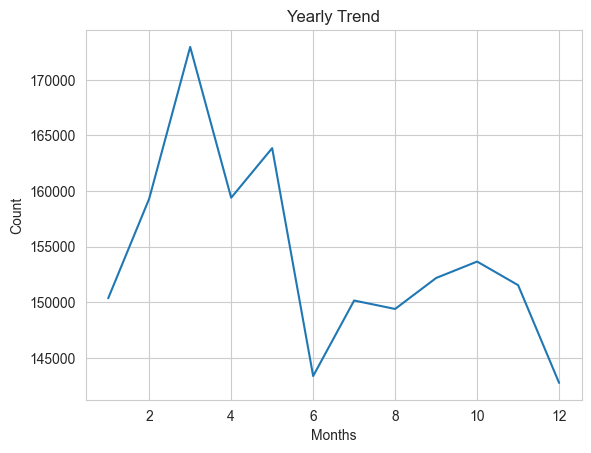

In [20]:
df["Date"] = pd.to_datetime(df["Date"])
yearlyData = df.groupby(df["Date"].dt.month).size()

yearlyData.plot(title="Yearly Trend", xlabel="Months", ylabel="Count");

It appears June and December have the least amount of traffic violations while it peaks at March. THe first half of the years has substantically more traffic violations than the rest of the year.

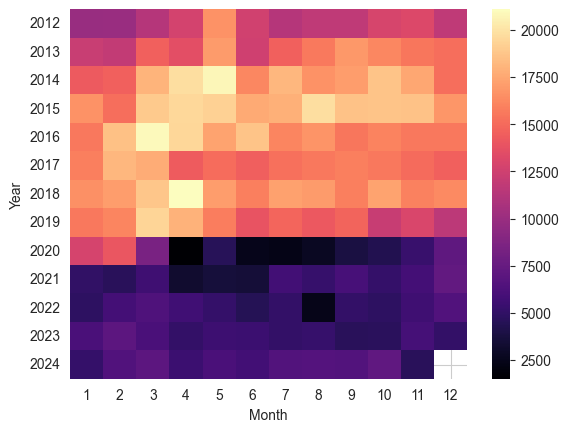

In [21]:
dfDates = pd.DataFrame()
dfDates["Year"] = df["Date"].dt.year
dfDates["Month"] = df["Date"].dt.month

yearMonthData = dfDates.groupby(["Year","Month"]).size().reset_index(name = "Count")

pivotTable = yearMonthData.pivot(values = "Count", index = "Year", columns = "Month")
sns.heatmap(pivotTable, cmap = "magma");

You can see where Covid-19 caused a lockdown in the US in the heatmap, its also interesting how traffic violations remained stagnated even 3 year later.

Next we can filter by race and gender on the search conducted column

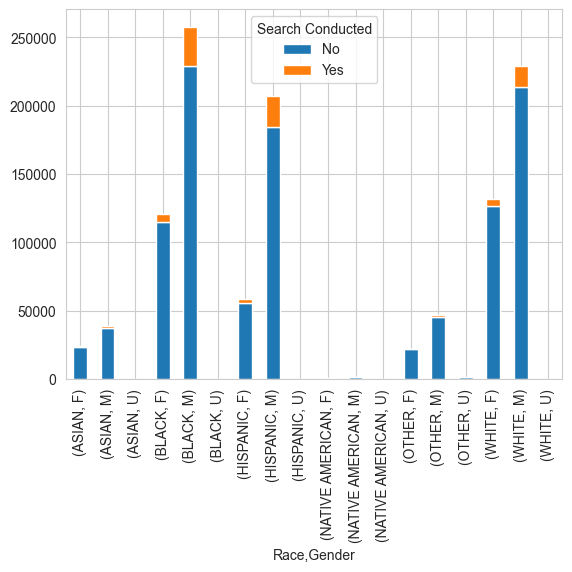

In [22]:
groupedRaceGender = df.groupby(["Race","Gender", "Search Conducted"]).size().unstack()
groupedRaceGender.plot(kind = "bar", stacked = "True");

In [26]:
x = groupedRaceGender.div(groupedRaceGender.sum(axis = 1), axis = 0)
x = x.fillna("")
display(x)

Search Conducted         No  Yes
Race            Gender          
ASIAN           F      0.98 0.02
                M      0.95 0.05
                U      1.00     
BLACK           F      0.95 0.05
                M      0.89 0.11
                U      0.66 0.34
HISPANIC        F      0.95 0.05
                M      0.89 0.11
                U      1.00     
NATIVE AMERICAN F      0.95 0.05
                M      0.95 0.05
                U      1.00     
OTHER           F      0.98 0.02
                M      0.96 0.04
                U      1.00     
WHITE           F      0.96 0.04
                M      0.93 0.07
                U      1.00

It appears that a higher proportion of males get their car searched than females across all races. Could there be a relationship between gender and the reason for searching? A chi-square test can be used to confirm this. 

Chi-square test is a statistical method used to find if a relationship between two categorical variables are becaue of chance or association.

In [24]:
table = pd.crosstab(df["Gender"], df["Search Reason"])
display(table)
# Some columns have an insignifint amount of data and can be removed
table = table.drop(["Arrest/Tow", "Probable Cause for CDS", "plain view marijuana", "DUI"], axis = 1)


Search Reason,Arrest/Tow,Consensual,DUI,Exigent Circumstances,Incident to Arrest,K-9,Other,Probable Cause,Probable Cause for CDS,plain view marijuana
Gender,,,,,,,,,,
F,0,1468,0,54,8690,256,201,3449,0,0
M,3,10343,1,447,40126,1445,836,17267,4,3
U,0,0,0,0,16,0,0,0,0,0


In [25]:
import scipy.stats as stats
chiStat, p_value, dof, expected = stats.chi2_contingency(table)
print("Since the Chi-Square test gives a value of", round(chiStat, 2), ", it means that there is a significant difference in search reasons between male and females." )

Since the Chi-Square test gives a value of 230.64 , it means that there is a significant difference in search reasons between male and females.


Men experience much higher frequency of searches across all categories, especially for incident to arrest and probable cause. Although the dataset has a disproportionate amount of males compare to females, the chi square test still indicates there is a highly significant relationship.